<a href="https://colab.research.google.com/github/AhmadMessbah/Python_330990/blob/master/American_ACCIDEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()


Saving Amercian accident.csv to Amercian accident.csv


In [3]:
import pandas as pd

file_path = list(uploaded.keys())[0]  # Get the uploaded filename
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,Source2,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,1,A-2,Source2,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,A-3,Source2,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,A-4,Source2,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,4,A-5,Source2,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   ID                     10000 non-null  object 
 2   Source                 10000 non-null  object 
 3   Severity               10000 non-null  int64  
 4   Start_Time             10000 non-null  object 
 5   End_Time               10000 non-null  object 
 6   Start_Lat              10000 non-null  float64
 7   Start_Lng              10000 non-null  float64
 8   End_Lat                0 non-null      float64
 9   End_Lng                0 non-null      float64
 10  Distance(mi)           10000 non-null  float64
 11  Description            10000 non-null  object 
 12  Street                 10000 non-null  object 
 13  City                   10000 non-null  object 
 14  County                 10000 non-null  object 
 15  Sta

In [ ]:
df.drop(columns=["Unnamed: 0", "ID", "End_Lat", "End_Lng", "Country"], inplace=True)


In [ ]:
missing_values=df.isnull().sum()/len(df) *100
missing_values[missing_values>0]


In [ ]:
df.drop(columns=["Wind_Chill(F)", "Precipitation(in)"], inplace=True)


In [ ]:
df["Temperature(F)"].fillna(df["Temperature(F)"].mean(), inplace=True)
df["Wind_Speed(mph)"].fillna(df["Wind_Speed(mph)"].median(), inplace=True)


In [ ]:
df["Weather_Condition"].fillna(df["Weather_Condition"].mode()[0], inplace=True)
df["Timezone"].fillna(df["Timezone"].mode()[0], inplace=True)


In [ ]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])


df["Accident_Duration"] = (df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 60  # Convert to minutes
df.drop(columns=["End_Time"], inplace=True)  # We don’t need it anymore


In [ ]:
df.info()
df.head()

In [ ]:
df["Severity"].value_counts()

In [ ]:
df["Severity"].value_counts(normalize=True) * 100  # Percentage distribution


In [ ]:
import matplotlib.pyplot as plt # Make sure to import the module using the plt alias.
import seaborn as sns

plt.figure(figsize=(8, 5))

In [ ]:
sns.countplot(x=df["Severity"], palette="Blues")
plt.xlabel("severity")
plt.ylabel("count")
plt.title("severity distribution")
plt.show()

10 top cites which have the huge quantity of accident

In [7]:
df["City"].value_counts().head(10)

,count
City,
Sacramento,1151
San Jose,574
Oakland,395
Dayton,321
San Francisco,271
Stockton,214
Tracy,212
Hayward,194
Columbus,170


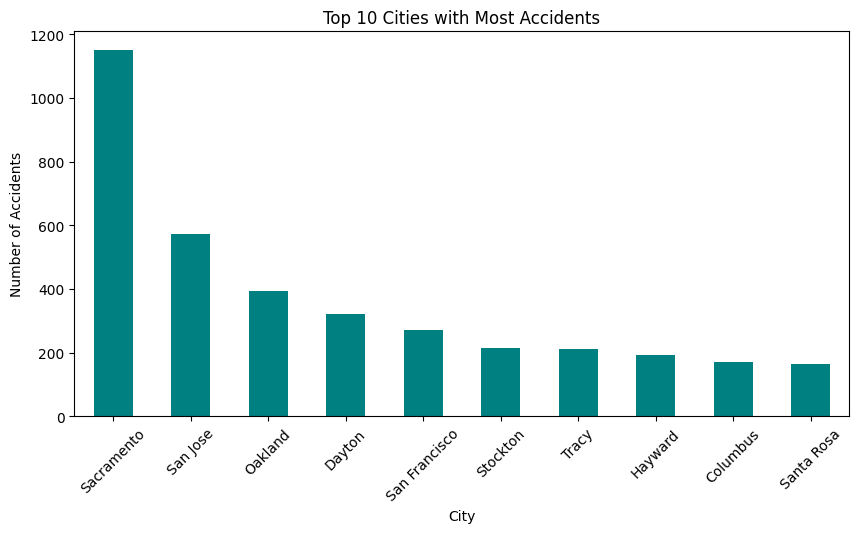

In [11]:
import matplotlib.pyplot as plt # Make sure to import the module using the plt alias.
import seaborn as sns

plt.figure(figsize=(10, 5))
df["City"].value_counts().nlargest(10).plot(kind="bar", color="teal")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Cities with Most Accidents")
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-2affe7276f7d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Severity", y="Temperature(F)", data=df, palette="Blues")


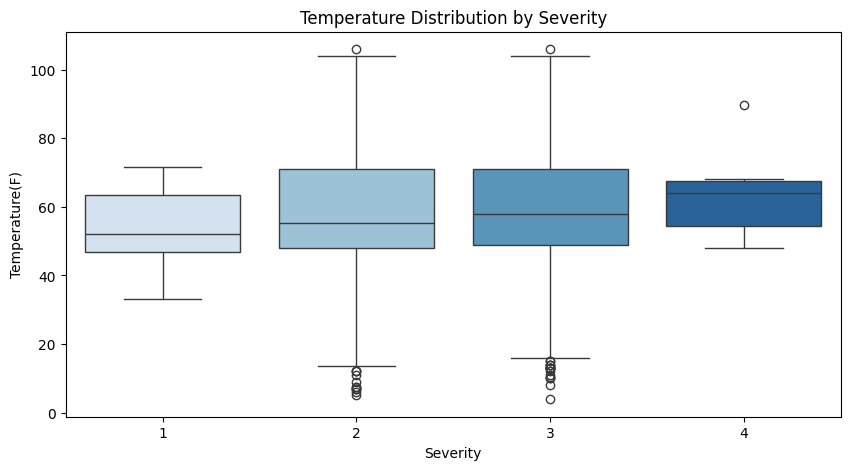

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Severity", y="Temperature(F)", data=df, palette="Blues")
plt.xlabel("Severity")
plt.ylabel("Temperature(F)")
plt.title("Temperature Distribution by Severity")
plt.show()

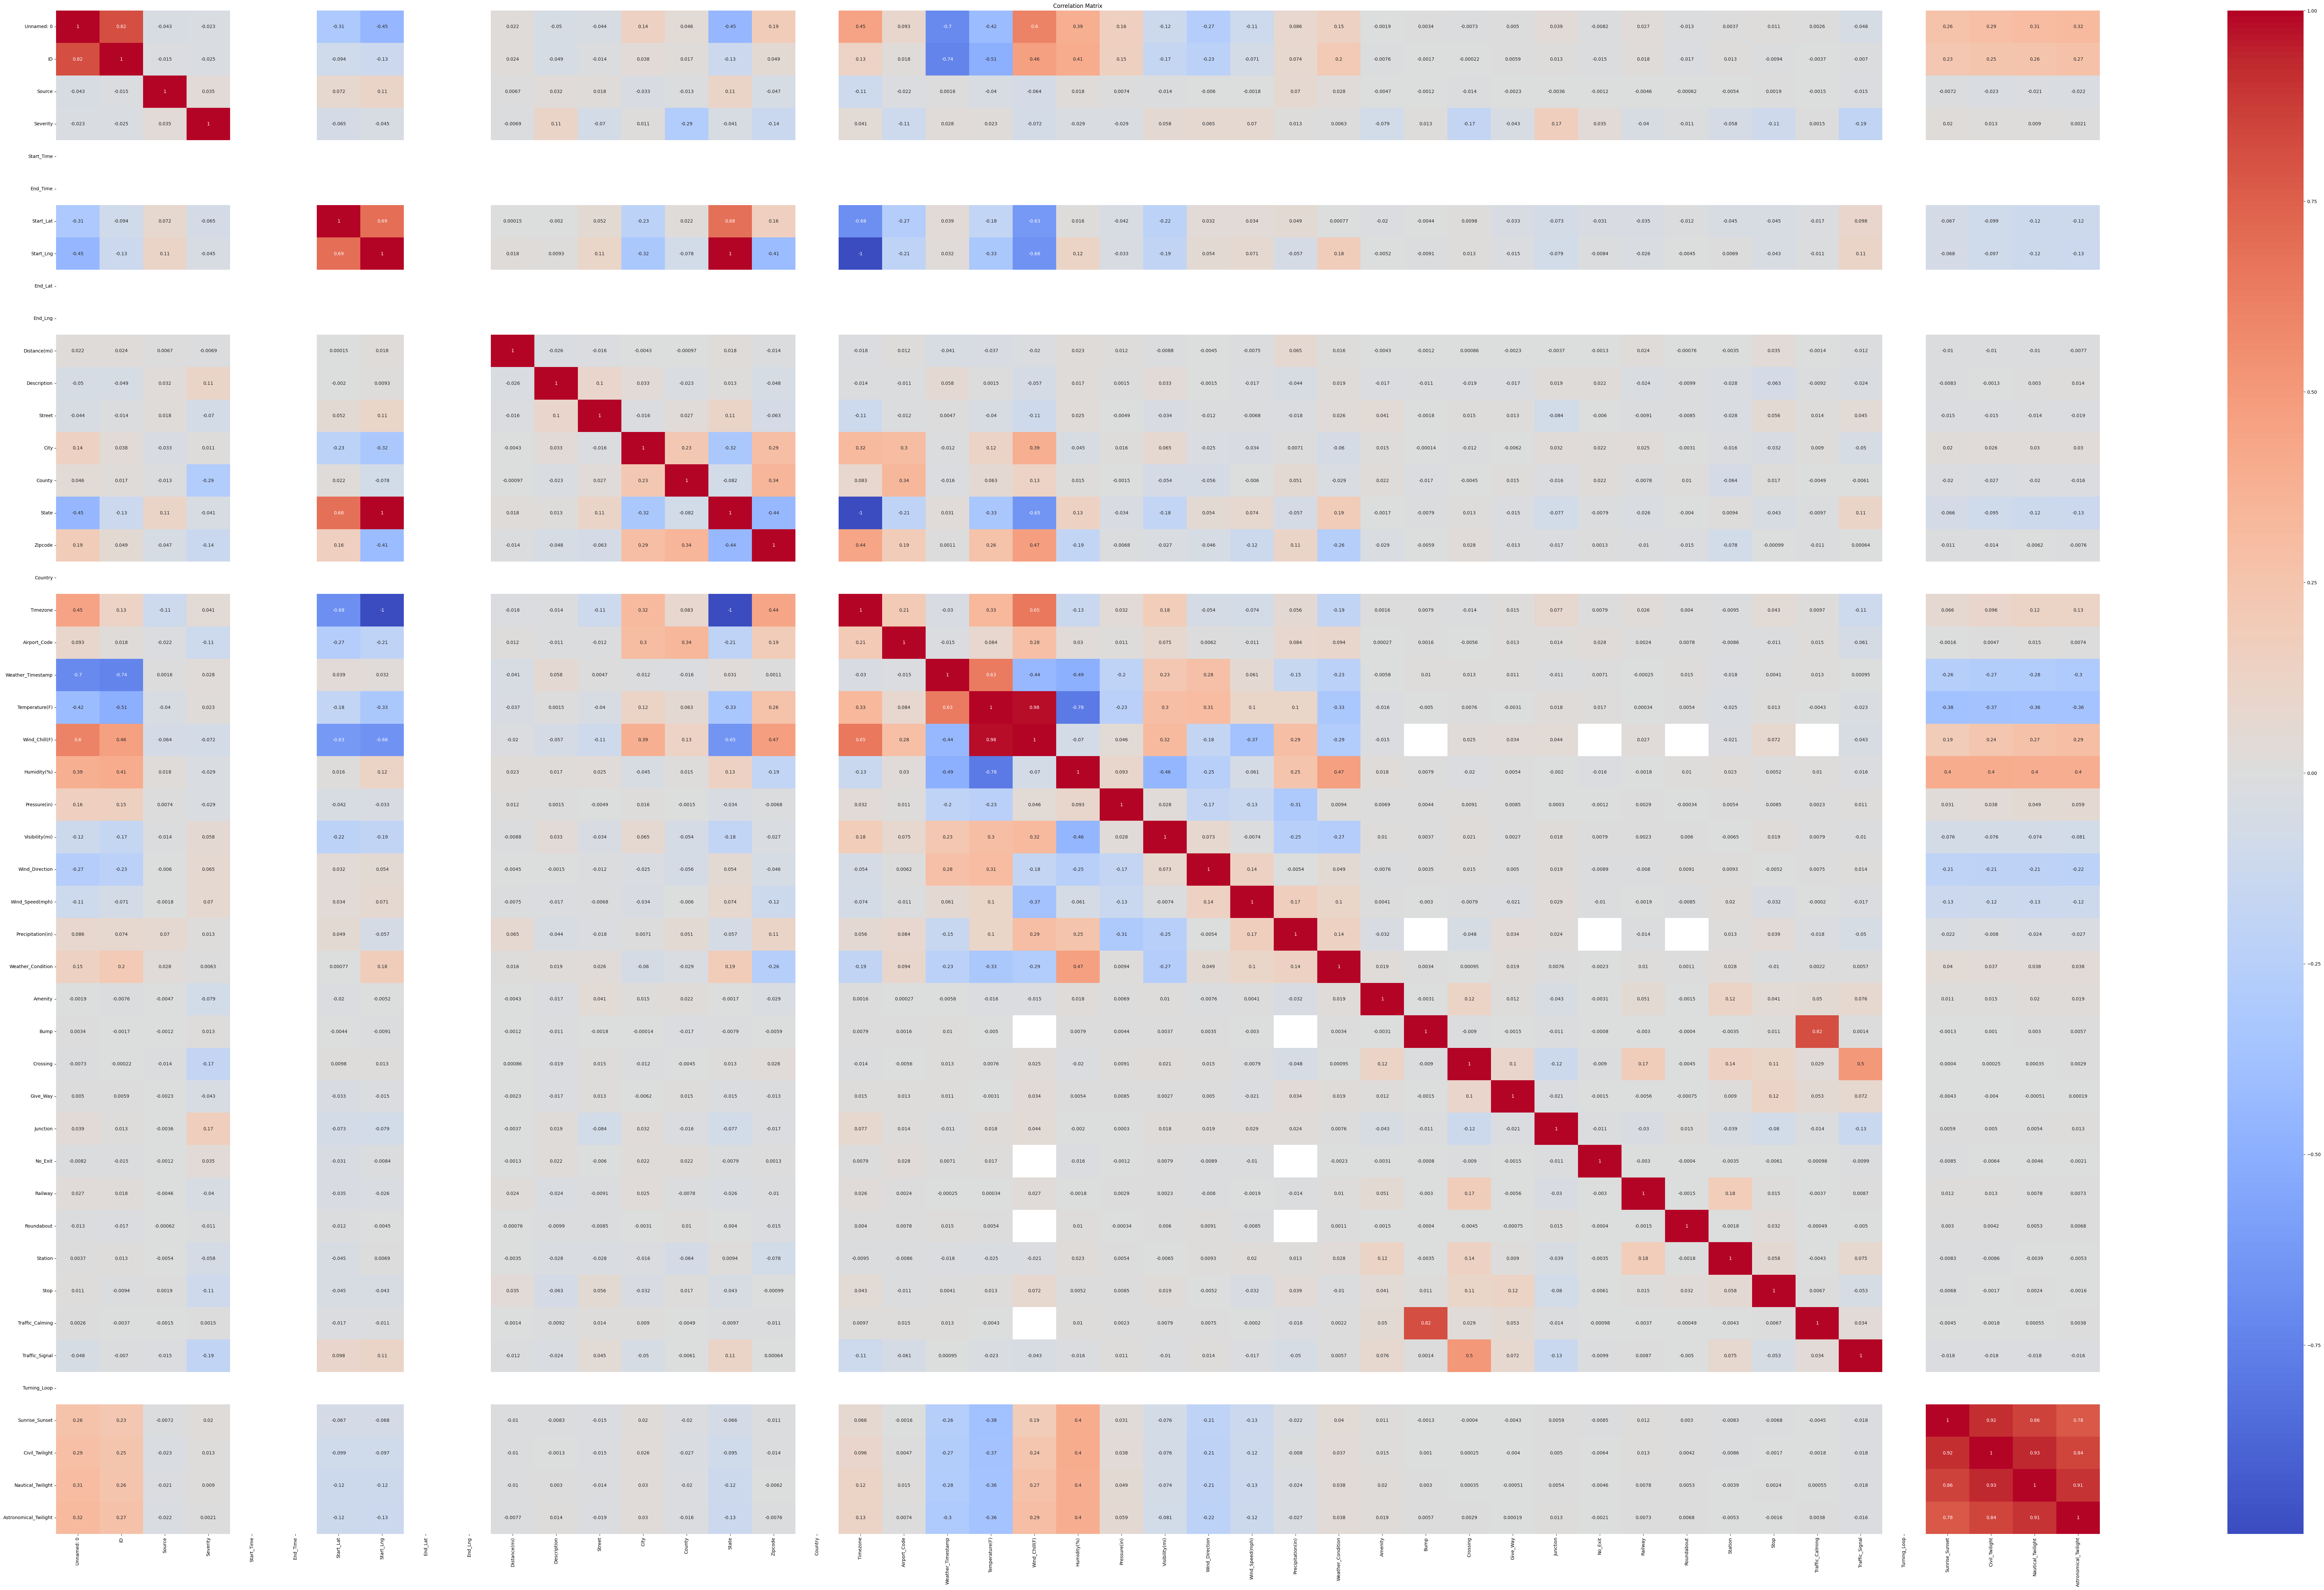

In [25]:
# Convert columns with object or string-like data types to numeric representation if appropriate.
# For example, if "Severity" is a column with categories, use label encoding:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:  # Select object type columns
    if col not in ['Start_Time', 'End_Time']:  # Exclude datetime columns
        df[col] = label_encoder.fit_transform(df[col])

# Convert datetime columns to numeric representation using timestamp
# This converts the datetime objects to Unix timestamps (number of seconds since the epoch)
for col in ['Start_Time', 'End_Time']:
    if col in df.columns:  # Check if the column exists
        # Ensure the columns are in datetime format before conversion
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Handle potential errors
        df[col] = pd.to_numeric(df[col]) / 10**9  # Convert to seconds

# Then generate the heatmap
plt.figure(figsize=(100, 60))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

 Convert columns with object or string-like data types to numeric representation if appropriate.
